In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import librosa 
import matplotlib.pyplot as plt
import numpy as np 
import IPython.display as ipd
import os
import glob
import json
import seaborn as sns
import random

In [3]:
audio_dir = '/kaggle/input/environmental-sound-classification-50/audio/audio';
audio16000_dir = '/kaggle/input/environmental-sound-classification-50/'
audio44100_dir = '/kaggle/input/environmental-sound-classification-50/'
sample_audio = '/kaggle/input/environmental-sound-classification-50/audio/audio/1-100210-A-36.wav'
# os.path.join(audio_dir, filename)

In [4]:
c = 0
if os.path.exists(audio_dir):
    for element in os.listdir(audio_dir):
        c+=1
c

2002

In [5]:
paths = []
labels = []
c = 0
# for dirname, _, filenames in os.walk('/kaggle/input/environmental-sound-classification-50'):
#     for filename in filenames:
#         c+=1
#         if(c>=5):
#             paths.append(os.path.join(dirname, filename))
#             label = filename.split('-')[-1]
#             label = label.split('.')[0]
#             labels.append(label)

# print(len(labels))

In [6]:
# labels

In [7]:
csv_labels = pd.read_csv('/kaggle/input/environmental-sound-classification-50/esc50.csv')
print(csv_labels.head())

            filename  fold  target        category  esc10  src_file take
0   1-100032-A-0.wav     1       0             dog   True    100032    A
1  1-100038-A-14.wav     1      14  chirping_birds  False    100038    A
2  1-100210-A-36.wav     1      36  vacuum_cleaner  False    100210    A
3  1-100210-B-36.wav     1      36  vacuum_cleaner  False    100210    B
4  1-101296-A-19.wav     1      19    thunderstorm  False    101296    A


In [8]:
csv_labels = csv_labels.drop(['fold','esc10','src_file','take'], axis=1)

In [9]:
csv_labels.head()

,filename,target,category
0,1-100032-A-0.wav,0,dog
1,1-100038-A-14.wav,14,chirping_birds
2,1-100210-A-36.wav,36,vacuum_cleaner
3,1-100210-B-36.wav,36,vacuum_cleaner
4,1-101296-A-19.wav,19,thunderstorm


<Axes: xlabel='category', ylabel='count'>

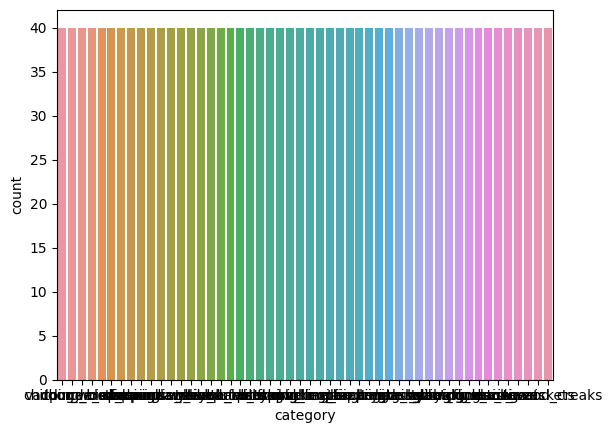

In [10]:
sns.countplot(x=csv_labels["category"]) 

In [11]:
len(csv_labels['category'].unique())

50

In [12]:
csv_labels['category'].value_counts()

category
dog                 40
chirping_birds      40
vacuum_cleaner      40
thunderstorm        40
door_wood_knock     40
can_opening         40
crow                40
clapping            40
fireworks           40
chainsaw            40
airplane            40
mouse_click         40
pouring_water       40
train               40
sheep               40
water_drops         40
church_bells        40
clock_alarm         40
keyboard_typing     40
wind                40
footsteps           40
frog                40
cow                 40
brushing_teeth      40
car_horn            40
crackling_fire      40
helicopter          40
drinking_sipping    40
rain                40
insects             40
laughing            40
hen                 40
engine              40
breathing           40
crying_baby         40
hand_saw            40
coughing            40
glass_breaking      40
snoring             40
toilet_flush        40
pig                 40
washing_machine     40
clock_tick          40
sn

In [13]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [14]:
features = []
labels = []
index = []
c = 0;

for i in csv_labels['filename']:
    path_audio = os.path.join(audio_dir,i)
    mfcc = extract_mfcc(path_audio)
    features.append(mfcc)
    labels.append(csv_labels['category'][c])
    index.append(csv_labels['target'][c])
    c += 1;

print(index[0],labels[0],c)

0 dog 2000


In [15]:
index = np.array(index)
features = np.array(features)
labels = np.array(labels)

In [16]:
print(index.shape,labels.shape,features.shape)

(2000,) (2000,) (2000, 40)


In [17]:
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder

Y = labels
X = features

le = LabelEncoder()
labels = le.fit_transform(Y)
labels

2024-06-04 12:55:04.207845: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-04 12:55:04.207948: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-04 12:55:04.327872: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


array([18,  7, 46, ..., 24, 39, 18])

In [19]:
from sklearn.model_selection import train_test_split

Y = tf.one_hot(labels, depth = 50)

X = np.array(features)
Y = np.array(Y)

Xtrain,Xvalid,Ytrain,Yvalid = train_test_split(X, Y, test_size=0.2, random_state=42)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xvalid = scaler.fit_transform(Xvalid)
Xtrain

array([[-0.6909054 ,  0.28237805,  1.1524687 , ..., -0.77431035,
         0.18126099, -0.56371784],
       [ 0.03319077,  0.4829779 ,  0.2684263 , ...,  0.4857336 ,
         0.31126016,  0.41415378],
       [ 0.19087547,  0.02265188,  0.19816676, ...,  0.83646363,
         0.29987243,  0.6106992 ],
       ...,
       [ 0.26428086, -0.20916165, -0.39940533, ..., -0.34451392,
         0.47867817,  0.25393274],
       [-0.63927686, -0.18888752,  0.15851836, ..., -1.5148727 ,
        -0.8090755 , -0.93288416],
       [ 0.7842972 ,  1.3423096 ,  0.09222229, ..., -0.62170774,
        -0.16557582, -1.256879  ]], dtype=float32)

In [21]:
Xtrain.shape

(1600, 40)

**L2 REGULARISATION: DID'NT HELP**

In [ ]:
# model = models.Sequential([
#     layers.Dense(64, activation='relu', input_shape=(40,), kernel_regularizer=tf.keras.regularizers.l2(0.001)),
#     layers.Dense(50, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
#     layers.Dense(50, activation='softmax')  
# ])

In [33]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(40,)),
    layers.Dense(64,activation='relu'),
    layers.Dense(50, activation='softmax')  
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(Xtrain, Ytrain, epochs=100, batch_size=32, validation_data=(Xvalid, Yvalid))

# Evaluate the model on training data
loss, accuracy = model.evaluate(Xtrain, Ytrain)
print("Training Accuracy:", accuracy)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 64)             │         2,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 50)             │         3,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,034 (39.20 KB)

 Trainable params: 10,034 (39.20 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.0207 - loss: 4.0157 - val_accuracy: 0.0500 - val_loss: 3.8673
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0944 - loss: 3.7223 - val_accuracy: 0.0900 - val_loss: 3.6940
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1345 - loss: 3.4879 - val_accuracy: 0.1100 - val_loss: 3.4656
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2159 - loss: 3.1549 - val_accuracy: 0.1600 - val_loss: 3.2216
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2939 - loss: 2.8451 - val_accuracy: 0.1850 - val_loss: 3.0345
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3299 - loss: 2.5941 - val_accuracy: 0.2000 - val_loss: 2.8845
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3943 - loss: 2.3626 - val_accuracy: 0.2225 - val_loss: 2.7866
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4332 - loss: 2.2450 - val_accuracy: 0.2350 - 

In [ ]:
# print("Labels Completed"

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9697 - loss: 0.1519
Loss =  0.1589365005493164
Accuracy =  97.1875011920929 %


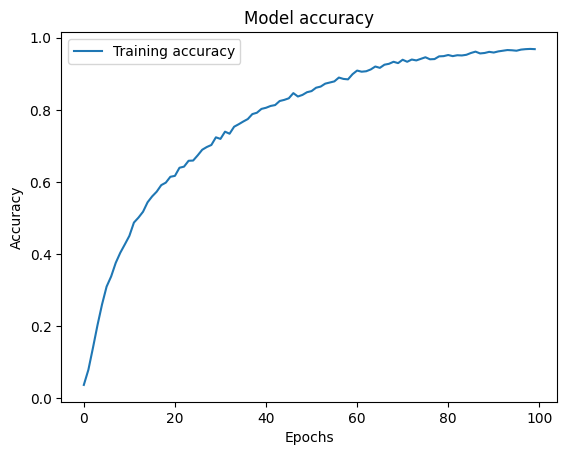

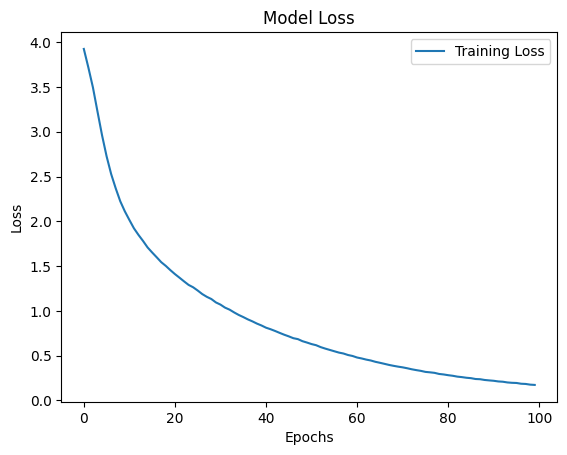

In [23]:
import matplotlib.pyplot as plt
results = model.evaluate(Xtrain, Ytrain)
print("Loss = ",results[0])
print("Accuracy = ",results[1]*100,"%")

# Plot Accuracy...
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.title("Model accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Similarly write code to plot loss...
plt.plot(history.history['loss'], label="Training Loss")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()